In [3]:
from langchain_community.document_loaders import PyPDFLoader
from IPython.display import Markdown
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import requests
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px
from langchain import hub
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import DataFrameLoader
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI


/Users/dunnkers/.pyenv/versions/3.11.1/envs/levels-of-rag/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
load_dotenv()

True

In [17]:
Markdown(
    PyPDFLoader("data/falcon/falcon-users-guide-2021-09.pdf") \
    .load() \
    [0] \
    .page_content
)

Overwriting cache for 0 11250


 
© Space Exploration Technologies Corp.  All rights reserved.  
  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
COPYRIGHT  
Subject to the existing rights of third parties, Space Exploration Technologies Corp. (SpaceX) is the owner of the copyright 
in this work, and no portion hereof is to be copied, reproduced, or disseminated without the prior written consent of 
SpaceX.  


In [16]:
Markdown(
    PyPDFLoader("data/falcon/Capabilities&Services.pdf") \
    .load() \
    [0] \
    .page_content
)


CAPABILITIES & SERVICESFALCON 9DESTINATIONSpaceX offers competitive pricing for its Falcon 9 and Falcon Heavy launch services. SpaceXalso offers crew transportation services tolow-Earth orbit (LEO) destinations.See additional information at spacex.com/humanspaceflight.
LOW-EARTH ORBIT (LEO)GEOSYNCHRONOUS TRANSFER ORBIT (GTO)PAYLOAD TO MARS22,000 kg50,265 lbs8,300 kg18,300 lbs4,020 kg8,860 lbsSTANDARD PAYMENT PLAN(through 2024)$69.75 MUp to 5.5 mT TO GTOPRICE *
*Pricing adjustments made in January 2024 account for inflation. Missions purchased in 2024 but flown beyond 2027 may be subject to additional adjustments due to inflation.Performance represents max capability on fully expendable vehicle.


In [26]:
Markdown(
    PyPDFLoader("data/falcon/586023main_8-3-11_NAFCOM.pdf") \
    .load() \
    [0] \
    .page_content
)


Falcon 9 Launch Vehicle
NAFCOM  Cost Estimates
August 2011
NASA Associate  Deputy Administrator  for Policy
1

In [ ]:
file_paths = [
    "data/falcon/falcon-users-guide-2021-09.pdf",
    "data/falcon/Capabilities&Services.pdf",
    "data/falcon/586023main_8-3-11_NAFCOM.pdf",
]
docs = []

for file_path in file_paths:
    loader = PyPDFLoader(file_path)
    docs += loader.load()

print(len(docs))

In [9]:
Markdown(
    docs[0].page_content
)

 
© Space Exploration Technologies Corp.  All rights reserved.  
  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
COPYRIGHT  
Subject to the existing rights of third parties, Space Exploration Technologies Corp. (SpaceX) is the owner of the copyright 
in this work, and no portion hereof is to be copied, reproduced, or disseminated without the prior written consent of 
SpaceX.  


In [71]:
docs[-1]

Document(page_content='Falcon\xa09\xa0NAFCOM \xa0Updated\xa0Cost\xa0Estimate\xa0Comparison\nUpdated\n(Cost Plus FeeVsFirm Fixed Price)\n (Cost\xa0Plus\xa0Fee\xa0Vs.\xa0Firm\xa0Fixed\xa0Price)\nFirm\xa0Fixed\xa0Price\xa0Acquisition Cost \xa0Plus\xa0Fee\xa0Acquisition\nWeight DDT&E 2 \xa0Test\xa0Flt\xa0Units Total DDT&E 2 \xa0Test\xa0Flt\xa0Units Total\nElements (lbs)(FY2010\xa0$M)(FY2010\xa0$M)(FY2010\xa0$M) (FY2010\xa0$M)(FY2010\xa0$M)(FY2010\xa0$M) () ( $) ( $) ( $) ( $) ( $) ( $)\nStage\xa0One\xa0(Including\xa0Engines) 39,080 $188.7 $109.3 $298.0 $370.6 $218.3 $588.9\nStage\xa0Two\xa0(Including\xa0Engine) 6,506 $89.0 $23.6 $112.6 $184.7 $59.6 $244.4\nFee\xa0(12.5%) $0.0 $0.0 $0.0 $69.4 $34.7 $104.2\nProgram Support (10%) $0.0 $0.0 $0.0 $62.5 $31.3 $93.7 Program\xa0Support\xa0(10%) $0.0 $0.0 $0.0 $62.5 $31.3 $93.7\nContingency \xa0(30%\xa0Vehicle,\xa010%\xa0Engine)) $0.0 $0.0 $0.0 $193.2 $91.7 $284.9\n‐Based\xa0on technical \xa0corrections \xa0and\xa0the\xa0additional \xa0insight\xa0i

In [27]:
llm = ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=0,
    model_kwargs={"top_p": 0.0001, "seed": 42},
)
embedding = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

In [28]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

In [75]:
# uncomment to re-create vectors and vectorstore
# vectorstore = FAISS.from_documents(splits, embedding=embedding)

In [29]:
vectorstore = FAISS.load_local("data/falcon_vectorstore.faiss", embeddings=embedding, allow_dangerous_deserialization=True)

In [30]:
retriever = vectorstore.as_retriever()

In [31]:
# uncomment to save the vectorstore
# vectorstore.save_local("data/falcon_vectorstore.faiss")

In [79]:
retriever.invoke(
    "standard payment plan"
)

[Document(page_content='© Space Exploration Technologies Corp.  All rights reserved.  5 \n \n \nThe standard pric e for Falcon  9 and Falcon Heavy launch services can be found at  \nhttps://www.spacex.com/media/Capabilities&Services.pdf . Pricing includes range services, standard payload \nintegration an d third -party liability insurance. Please see Section 7.3 for a complete description of standard services . \nNonstandard services  are also available.', metadata={'source': 'data/falcon/falcon-users-guide-2021-09.pdf', 'page': 8}),
 Document(page_content='Contracting  ................................ ................................ ................................ ................................ ................................ .........  52 \n Mission Management  ................................ ................................ ................................ ................................ ......................  52 \n Standard Services  ................................ .......

In [32]:
prompt = hub.pull("rlm/rag-prompt")

In [33]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [34]:
retriever.invoke(
    "whats the price for a falcon 9 rocket?"
)

[Document(page_content='Falcon\xa09\xa0NAFCOM \xa0Updated\xa0Cost\xa0Estimate\xa0Comparison\nUpdated\n(Cost Plus FeeVsFirm Fixed Price)\n (Cost\xa0Plus\xa0Fee\xa0Vs.\xa0Firm\xa0Fixed\xa0Price)\nFirm\xa0Fixed\xa0Price\xa0Acquisition Cost \xa0Plus\xa0Fee\xa0Acquisition\nWeight DDT&E 2 \xa0Test\xa0Flt\xa0Units Total DDT&E 2 \xa0Test\xa0Flt\xa0Units Total\nElements (lbs)(FY2010\xa0$M)(FY2010\xa0$M)(FY2010\xa0$M) (FY2010\xa0$M)(FY2010\xa0$M)(FY2010\xa0$M) () ( $) ( $) ( $) ( $) ( $) ( $)\nStage\xa0One\xa0(Including\xa0Engines) 39,080 $188.7 $109.3 $298.0 $370.6 $218.3 $588.9\nStage\xa0Two\xa0(Including\xa0Engine) 6,506 $89.0 $23.6 $112.6 $184.7 $59.6 $244.4\nFee\xa0(12.5%) $0.0 $0.0 $0.0 $69.4 $34.7 $104.2\nProgram Support (10%) $0.0 $0.0 $0.0 $62.5 $31.3 $93.7 Program\xa0Support\xa0(10%) $0.0 $0.0 $0.0 $62.5 $31.3 $93.7\nContingency \xa0(30%\xa0Vehicle,\xa010%\xa0Engine)) $0.0 $0.0 $0.0 $193.2 $91.7 $284.9\n‐Based\xa0on technical \xa0corrections \xa0and\xa0the\xa0additional \xa0insight\xa0

In [35]:
Markdown(
    rag_chain.invoke(
        "whats the price for a falcon 9 rocket?"
    )
)

The price for a Falcon 9 rocket can be found on the SpaceX website in the document "Capabilities & Services." The pricing includes range services, standard payload integration, and third-party liability insurance. Nonstandard services are also available for additional costs.

In [36]:
retriever.invoke(
    "whats the price for a falcon 9 rocket with the standard payment plan?"
)

[Document(page_content='Falcon\xa09\xa0NAFCOM \xa0Updated\xa0Cost\xa0Estimate\xa0Comparison\nUpdated\n(Cost Plus FeeVsFirm Fixed Price)\n (Cost\xa0Plus\xa0Fee\xa0Vs.\xa0Firm\xa0Fixed\xa0Price)\nFirm\xa0Fixed\xa0Price\xa0Acquisition Cost \xa0Plus\xa0Fee\xa0Acquisition\nWeight DDT&E 2 \xa0Test\xa0Flt\xa0Units Total DDT&E 2 \xa0Test\xa0Flt\xa0Units Total\nElements (lbs)(FY2010\xa0$M)(FY2010\xa0$M)(FY2010\xa0$M) (FY2010\xa0$M)(FY2010\xa0$M)(FY2010\xa0$M) () ( $) ( $) ( $) ( $) ( $) ( $)\nStage\xa0One\xa0(Including\xa0Engines) 39,080 $188.7 $109.3 $298.0 $370.6 $218.3 $588.9\nStage\xa0Two\xa0(Including\xa0Engine) 6,506 $89.0 $23.6 $112.6 $184.7 $59.6 $244.4\nFee\xa0(12.5%) $0.0 $0.0 $0.0 $69.4 $34.7 $104.2\nProgram Support (10%) $0.0 $0.0 $0.0 $62.5 $31.3 $93.7 Program\xa0Support\xa0(10%) $0.0 $0.0 $0.0 $62.5 $31.3 $93.7\nContingency \xa0(30%\xa0Vehicle,\xa010%\xa0Engine)) $0.0 $0.0 $0.0 $193.2 $91.7 $284.9\n‐Based\xa0on technical \xa0corrections \xa0and\xa0the\xa0additional \xa0insight\xa0

In [37]:
Markdown(
    rag_chain.invoke(
        "whats the price for a falcon 9 rocket launch with the standard payment plan?"
    )
)

The price for a Falcon 9 rocket launch with the standard payment plan is $69.75 million through 2024. This pricing includes range services, standard payload integration, and third-party liability insurance. Additional information can be found in Section 7.3 of the provided document.

In [38]:
retriever.invoke(
    "what is the payload I carry with the Falcon 9 rocket to Mars?"
)

[Document(page_content='© Space Exploration Technologies Corp.  All rights reserved.  72 \n Table 7 -3: Additional required documents and data for non -US persons and n on-US government \npayloads  ................................ ................................ ................................ ................................ ...........................  55 \nTable 8 -1: Services and equipment for payload processing  ................................ ................................ .. 58 \nTable 8 -2: Launch control organization  ................................ ................................ ................................ ..... 61 \nTable 8 -3: Falcon 9 sample flight timeline —GTO mission  ................................ ................................ ..... 66 \nTable 8 -4: Falcon 9 sample flight timeline —LEO mission  ................................ ................................ ...... 66', metadata={'source': 'data/falcon/falcon-users-guide-2021-09.pdf', 'page': 75}),
 

In [39]:
Markdown(
    rag_chain.invoke(
        "what is the payload I can carry with the Falcon 9 rocket to Mars?"
    )
)

The payload capacity of the Falcon 9 rocket to Mars is 8,300 kg or 18,300 lbs. SpaceX offers competitive pricing for its launch services to various destinations, including low-Earth orbit and Mars. Customers need to verify the mass properties of their payload before shipping it to the launch site.

In [40]:
retriever.invoke(
    "estimated, what amount of money does it take to create a Falcon 9 rocket?"
)

[Document(page_content='Falcon\xa09\xa0NAFCOM \xa0Updated\xa0Cost\xa0Estimate\xa0Comparison\nUpdated\n(Cost Plus FeeVsFirm Fixed Price)\n (Cost\xa0Plus\xa0Fee\xa0Vs.\xa0Firm\xa0Fixed\xa0Price)\nFirm\xa0Fixed\xa0Price\xa0Acquisition Cost \xa0Plus\xa0Fee\xa0Acquisition\nWeight DDT&E 2 \xa0Test\xa0Flt\xa0Units Total DDT&E 2 \xa0Test\xa0Flt\xa0Units Total\nElements (lbs)(FY2010\xa0$M)(FY2010\xa0$M)(FY2010\xa0$M) (FY2010\xa0$M)(FY2010\xa0$M)(FY2010\xa0$M) () ( $) ( $) ( $) ( $) ( $) ( $)\nStage\xa0One\xa0(Including\xa0Engines) 39,080 $188.7 $109.3 $298.0 $370.6 $218.3 $588.9\nStage\xa0Two\xa0(Including\xa0Engine) 6,506 $89.0 $23.6 $112.6 $184.7 $59.6 $244.4\nFee\xa0(12.5%) $0.0 $0.0 $0.0 $69.4 $34.7 $104.2\nProgram Support (10%) $0.0 $0.0 $0.0 $62.5 $31.3 $93.7 Program\xa0Support\xa0(10%) $0.0 $0.0 $0.0 $62.5 $31.3 $93.7\nContingency \xa0(30%\xa0Vehicle,\xa010%\xa0Engine)) $0.0 $0.0 $0.0 $193.2 $91.7 $284.9\n‐Based\xa0on technical \xa0corrections \xa0and\xa0the\xa0additional \xa0insight\xa0

In [41]:
Markdown(
    rag_chain.invoke(
        "estimated, what amount of money does it take to create a Falcon 9 rocket?"
    )
)

It takes an estimated $3.977 billion to create a Falcon 9 rocket based on the traditional NASA environment/culture approach. However, when adjusted to a more commercial development approach, the cost is predicted to be $1.695 billion. These estimates were provided using the NASA-Air Force Cost Model (NAFCOM) in late 2010-early 2011.

In [42]:
Markdown(
    rag_chain.invoke(
        "what is the total cost for Stage Two Space-X approach vs NASA?"
    )
)

The total cost for Stage Two SpaceX approach is $651 million, while the total cost for NASA approach is $3.977 billion. The estimates were updated to include both Cost Plus Fee and Firm Fixed Price approaches, with SpaceX providing technical parameters and inputs.

In [43]:
Markdown(
    rag_chain.invoke(
        "What is the Bounding Fairing Composite Temperature?"
    )
)

The Bounding Fairing Composite Temperature is the maximum temperature that the fairing composite structure should not exceed during flight. The fairing thermal insulation is designed to ensure that the composite temperature stays within acceptable limits. The timing of payload fairing jettison is determined based on customer requirements and system limitations.

In [44]:
Markdown(
    rag_chain.invoke(
        "how many seconds after Falcon 9 launch does the maximum payload fairing spot temperature reach 130 Fahrenheit?"
    )
)

I don't know.

In [45]:
retriever.invoke(
    "how many seconds after Falcon 9 launch does the maximum payload fairing spot temperature reach 130 Fahrenheit?"
)

[Document(page_content='earlier, at around 210 seconds into flight. Payload fairing jettison timing is determined by customer requirements and \nphysical limitations of the system.  \n \n \nThe payload fairing will nominally be deployed when free molecular aero -thermal heating is less than 1,135 W/m2. Other \nfairing deploy ment  constraints can be accommodated as a standard service, although they may modest ly reduce vehicle \nperformance. Please contact SpaceX regarding mission -unique fairing deployment requirements.  80100120140160180200\n0 50 100 150 200 250Temperature [F]\nTime [s]Bounding Fairing Composite Temperature', metadata={'source': 'data/falcon/falcon-users-guide-2021-09.pdf', 'page': 41}),
 Document(page_content='payload fairing internal pressure will decay at a rate no larger than 0.65 psi/sec (4.5 kPa/sec), for no more than 5 \nseconds.  \n \nThe SpaceX payload fairing is a composite structure consisting of a 2.5 -cm (1 -in.) thick alumin um honeycomb core \nsurround

## Tables


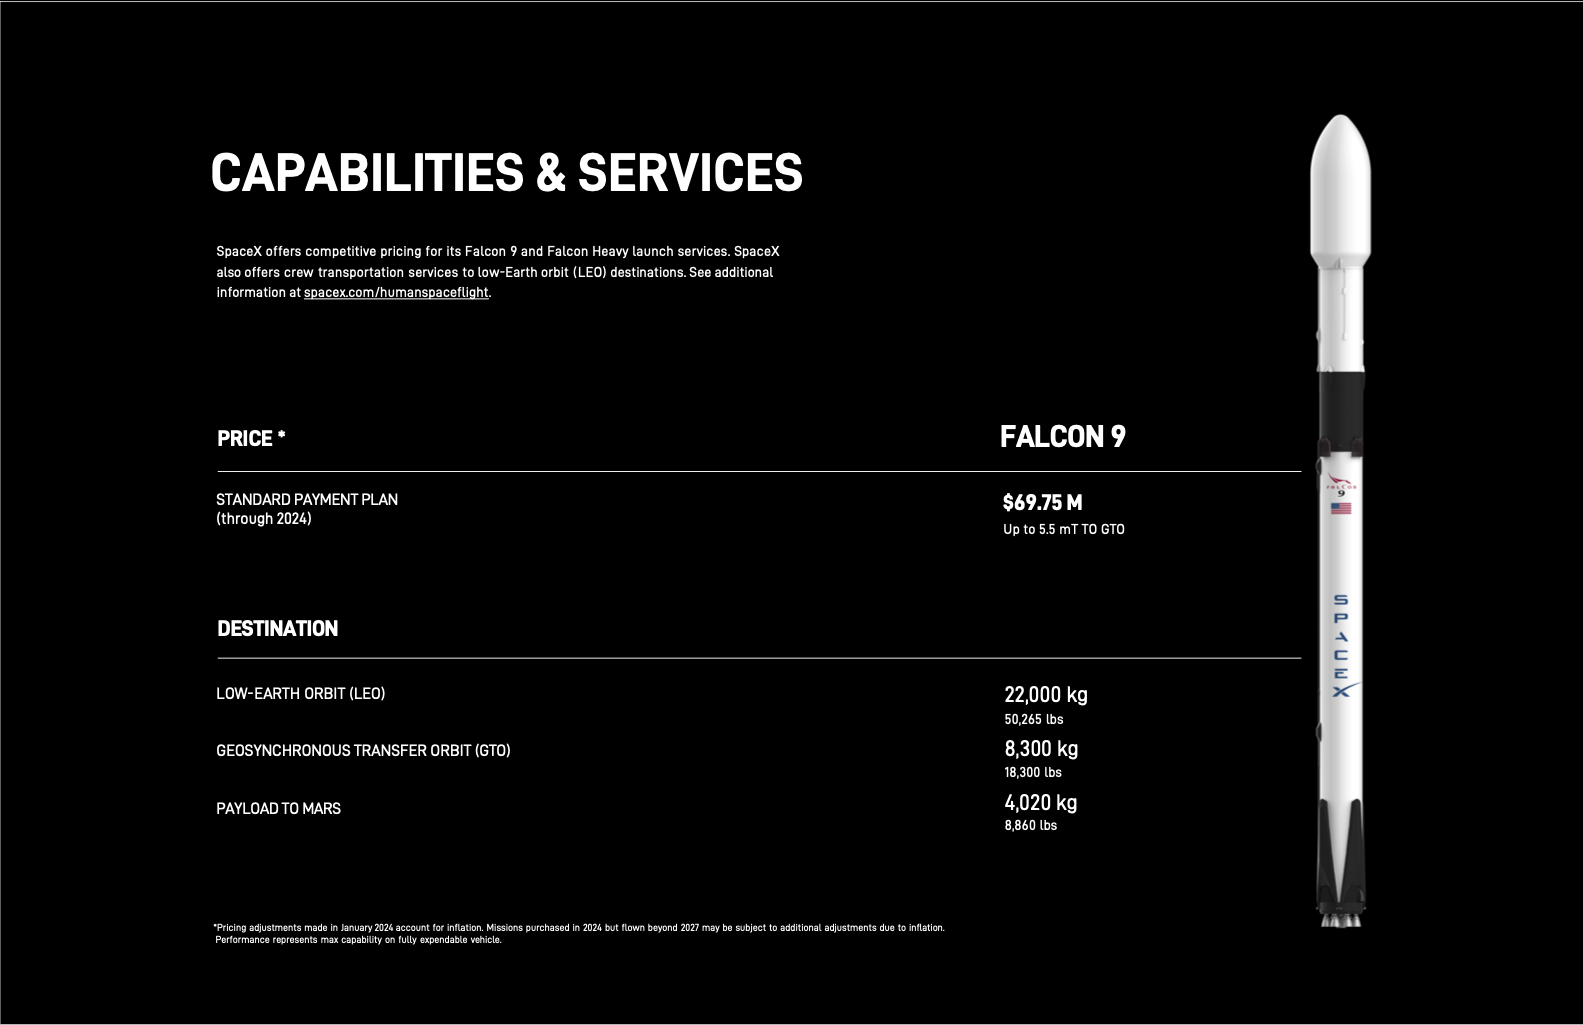

In [2]:
from transformers import AutoImageProcessor, TableTransformerModel
from PIL import Image

file_path = "data/falcon/Capabilities&Services.png"
image = Image.open(file_path).convert("RGB")
image

In [ ]:

image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerModel.from_pretrained("microsoft/table-transformer-detection")

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

# forward pass
outputs = model(**inputs)

# the last hidden states are the final query embeddings of the Transformer decoder
# these are of shape (batch_size, num_queries, hidden_size)
last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

In [5]:
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [4]:
from transformers import DetrFeatureExtractor

feature_extractor = DetrFeatureExtractor()

# rescale bounding boxes
width, height = image.size
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]

/Users/dunnkers/.pyenv/versions/3.11.1/envs/levels-of-rag/lib/python3.11/site-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(


AttributeError: 'TableTransformerModelOutput' object has no attribute 'logits'